In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
T=100.0
dt=0.02
t=numpy.arange(0.0, T+dt, dt)

In [9]:
N = int(T/dt)+1
z0 = 100.
b0 = 10.
zt = 100.
g = 9.81
u = numpy.array([z0, b0])
z = numpy.zeros(N)
z[0] = z0
for n in range(1,N) :
    u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
    z[n]=u[0]

In [6]:
u

array([ 100.,   10.])

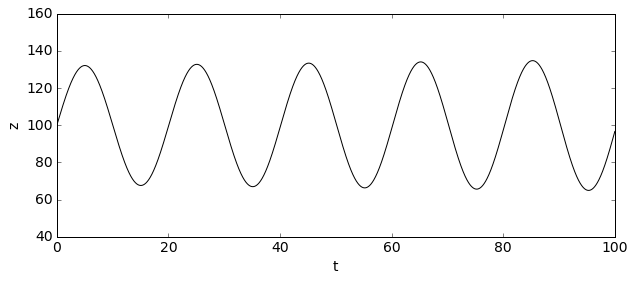

In [10]:
pyplot.figure(figsize=(10,4)) #set plot size
pyplot.ylim(40,160) #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size of ticks 
pyplot.xlabel ('t', fontsize=14) #x label
pyplot.ylabel ('z', fontsize=14) #y label
pyplot.plot(t,z, 'k-');

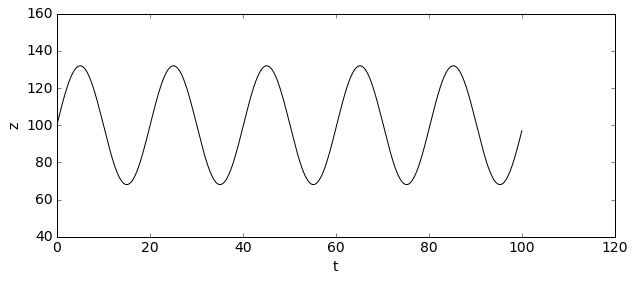

In [20]:
import numpy
from matplotlib import pyplot
%matplotlib inline
T=100.0
dt=0.00001
t=numpy.arange(0.0, T+dt, dt)
N = int(T/dt)+1
z0 = 100.
b0 = 10.
zt = 100.
g = 9.81
u = numpy.array([z0, b0])
z = numpy.zeros(N)
z[0] = z0
for n in range(1,N) :
    u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
    z[n]=u[0]
pyplot.figure(figsize=(10,4)) #set plot size
pyplot.ylim(40,160) #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size of ticks 
pyplot.xlabel ('t', fontsize=14) #x label
pyplot.ylabel ('z', fontsize=14) #y label
pyplot.plot(t,z, 'k-');
z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
            (z0-zt)*numpy.cos((g/zt)**.5*t)+zt

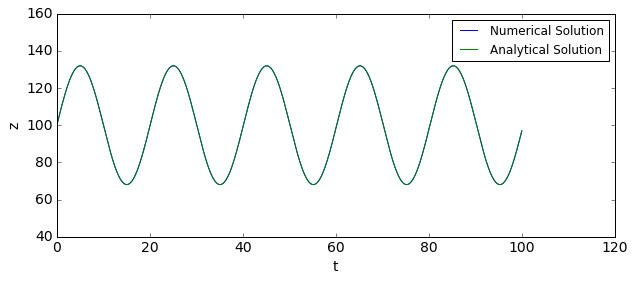

In [21]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40,160)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('z', fontsize=14) #y label
pyplot.plot(t,z)
pyplot.plot(t, z_exact)
pyplot.legend(['Numerical Solution','Analytical Solution']);

In [27]:
# time-increment array
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

# array that will contain solution of each grid
z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt)+1    # number of time-steps
    ### discretize the time using numpy.linspace() ###
    t = numpy.linspace(0.0, T, N)

    # initial conditions
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    
    # time loop - Euler method
    for n in range(1,N):
        ### compute next solution using Euler method ###
        u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
        z[n] = u[0]   # store the elevation at time-step n+1
    
    z_values[i] = z.copy()    # store the total elevation calculation grid i
def get_error(z, dt):
    """Returns the error relative to analytical solution using L-1 norm.
    
    Parameters
    ----------
    z : array of float
        numerical solution.
    dt : float
        time increment.
        
    Returns
    -------
    err : float
        L_{1} norm of the error with respect to the exact solution.
    """
    N = len(z)
    t = numpy.linspace(0.0, T, N)
    
    z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
                (z0-zt)*numpy.cos((g/zt)**.5*t)+zt
    
    return dt * numpy.sum(numpy.abs(z-z_exact))
error_values = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    ### call the function get_error() ###
    error_values[i] = get_error(z_values[i], dt)

In [29]:
error_values = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    ### call the function get_error() ###
    error_values[i] = get_error(z_values[i], dt)

(0.0001, 0.10000000000000001, 0.10000000000000001, 1000.0)

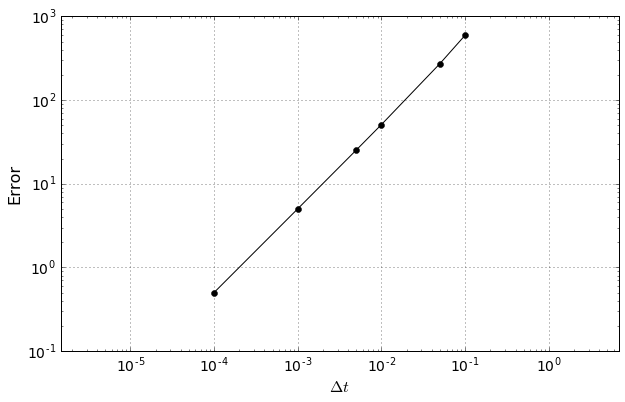

In [28]:
pyplot.figure(figsize=(10, 6))
pyplot.tick_params(axis='both', labelsize=14) #increase tick font size
pyplot.grid(True)                         #turn on grid lines
pyplot.xlabel('$\Delta t$', fontsize=16)  #x label
pyplot.ylabel('Error', fontsize=16)       #y label
pyplot.loglog(dt_values, error_values, 'ko-')  #log-log plot
pyplot.axis('equal')                      #make axes scale equally;